In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image
import cv2
import warnings
warnings.filterwarnings(action='once')
new_size = 100,100

def do_meanshift(img):
    img_mat = np.array(img)[:, :, :3]

    # Extract the three colour channels
    red = img_mat[:, :, 0]
    green = img_mat[:, :, 1]
    blue = img_mat[:, :, 2]

    # Store the shape so we can reshape later
    original_shape = red.shape
    colour_samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])

    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples).reshape(original_shape)
    return ms_labels


def do_watershed(img):
    # Convert the image to greyscale
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert to binary image (note: can also use cv thresholding)
    img_array = cv2.threshold(img_grey, 20, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1] 
    distance = ndi.distance_transform_edt(img_array)
    
    # Both implemetations of peak_local_max will work, but will produce
    # different outputs. Both are acceptable.
    local_maxi = peak_local_max(distance, indices=False,
                                footprint=np.ones((3, 3)),
                                labels=img_array)
    # local_maxi = peak_local_max(distance, indices=False)
                                
    markers = ndi.label(local_maxi)[0]
    ws_labels = watershed(-distance, markers, mask=img_array)
    #print("Distance:", distance)
    return ws_labels, distance


def plot_three_images(figure_title, image1, label1,image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

def plot_two_images(figure_title, image1, label1,
                      image2, label2):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

C:\Users\Manna\anaconda3\envs\py35\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


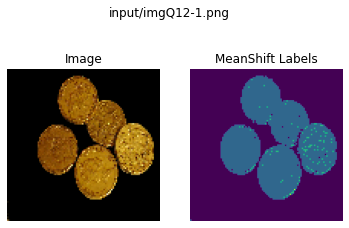

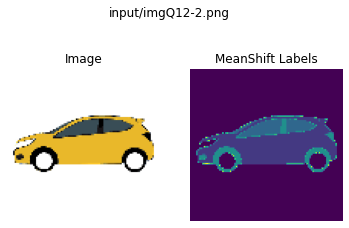

In [40]:
# Q1 MEANSHIFT
Q1img_names = ["input/imgQ12-1.png", "input/imgQ12-2.png"]
for img_name in Q1img_names:
    image = cv2.imread(img_name)
    img = cv2.resize(image,new_size,interpolation=cv2.INTER_CUBIC)
    ms_labels = do_meanshift(img)
    plot_two_images(img_name, img, "Image",
                      ms_labels, "MeanShift Labels")

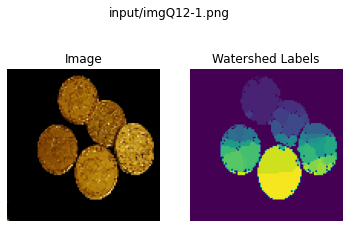

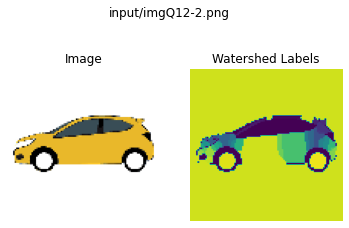

In [43]:
# Q2 WATERSHED
Q2img_names = ["input/imgQ12-1.png", "input/imgQ12-2.png"]
for img_name in Q2img_names:
    image = cv2.imread(img_name)
    img = cv2.resize(image,new_size,interpolation=cv2.INTER_CUBIC)
    ws_labels, distance = do_watershed(img)
    plot_two_images(img_name, img, "Image",ws_labels, "Watershed Labels")

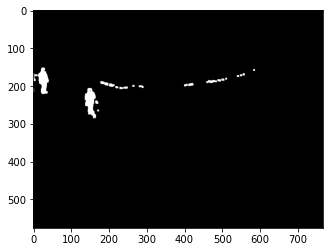

In [44]:
# Q3 MOTION DETECTION
bkgrd = cv2.imread('input/imgQ31.jpg',0)
frame = cv2.imread('input/imgQ32.jpg',0)

#Image Subtraction
diff = cv2.absdiff(frame,bkgrd)
# Thresholding
thres_diff = cv2.threshold(diff, 75, 255,cv2.THRESH_BINARY)[1]
# Dialate to fill holes 
thres_diff = cv2.dilate(thres_diff, None, iterations =2)
plt.imshow(thres_diff,'gray')

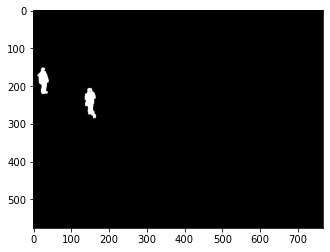

In [45]:
#finding all coonected components
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thres_diff,connectivity=8)
# excluding background 
sizes = stats[1:, -1]
num_labels = num_labels - 1
main_diff = thres_diff
#Removing small components
for i in range(0, num_labels):
    if sizes[i] < 260:
        main_diff[labels_im == i + 1] = 0
plt.imshow(main_diff,'gray')

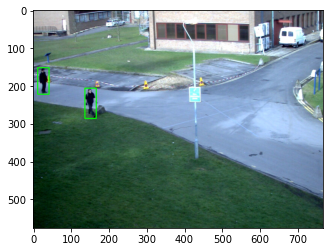

In [46]:
# recomputing connected components 
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(main_diff,connectivity=8) 
#removing background
stats = stats[1:]
# Reading the Color image
frame = cv2.imread('input/imgQ32.jpg')
num_obj =  stats.shape[0]
#Drawing Bounding Boxes
for obj in range(num_obj):
    (x,y,w,h)= stats[obj,:-1]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

C:\Users\Manna\anaconda3\envs\py35\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Manna\anaconda3\envs\py35\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
C:\Users\Manna\anaconda3\envs\py35\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


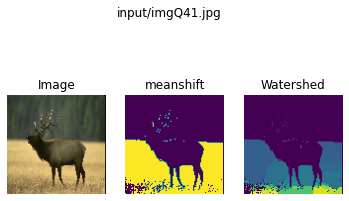

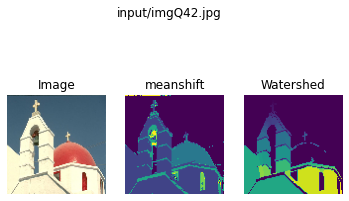

In [11]:
# Q4 Assessment Question
Q4img_names = ["input/imgQ41.jpg", "input/imgQ42.jpg"]
for cnt,img_name in enumerate(Q4img_names):
    image = cv2.imread(img_name)
    # REsizing image to reduce execution time
    img = cv2.resize(image,new_size,interpolation=cv2.INTER_CUBIC)
    #Meanshift and watershed
    ms_labels = do_meanshift(img)
    ws_labels, distance = do_watershed(img)
    plot_three_images(img_name, img, "Image",ms_labels,"meanshift", ws_labels, "Watershed")